About the Dataset:

1. id: unique id for a news article
2. title: the title of a news article
3. author: author of the news article
4. text: the text of the article; could be incomplete
5. label: a label that marks whether the news article is real or fake:
           1: Fake news
           0: real News





Importing the Dependencies

In [6]:
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords

from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

In [7]:
# import nltk
# nltk.download('stopwords')

In [8]:
# printing the stopwords in English
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

Data Pre-processing

In [9]:
# loading the dataset to a pandas DataFrame
news_dataset = pd.read_csv('/Users/divyanshkapoor/Downloads/train.csv')

In [10]:
news_dataset.shape

(20800, 5)

In [11]:
# print the first 5 rows of the dataframe
news_dataset.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [12]:
# news_dataset = news_dataset.drop(labels=range(1000, 2000), axis=0)

In [13]:
news_dataset.shape

(20800, 5)

In [14]:
# counting the number of missing values in the dataset
news_dataset.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [15]:
# replacing the null values with empty string
news_dataset = news_dataset.fillna('')

In [16]:

news_dataset['content'] = news_dataset['title']+' '+news_dataset['author']

In [17]:
print(news_dataset['content'])

0        House Dem Aide: We Didn’t Even See Comey’s Let...
1        FLYNN: Hillary Clinton, Big Woman on Campus - ...
2        Why the Truth Might Get You Fired Consortiumne...
3        15 Civilians Killed In Single US Airstrike Hav...
4        Iranian woman jailed for fictional unpublished...
                               ...                        
20795    Rapper T.I.: Trump a ’Poster Child For White S...
20796    N.F.L. Playoffs: Schedule, Matchups and Odds -...
20797    Macy’s Is Said to Receive Takeover Approach by...
20798    NATO, Russia To Hold Parallel Exercises In Bal...
20799              What Keeps the F-35 Alive David Swanson
Name: content, Length: 20800, dtype: object


In [18]:
# separating the data & label
X = news_dataset.drop(columns='label', axis=1)
Y = news_dataset['label']

In [19]:
print(X)
print(Y)

          id                                              title  \
0          0  House Dem Aide: We Didn’t Even See Comey’s Let...   
1          1  FLYNN: Hillary Clinton, Big Woman on Campus - ...   
2          2                  Why the Truth Might Get You Fired   
3          3  15 Civilians Killed In Single US Airstrike Hav...   
4          4  Iranian woman jailed for fictional unpublished...   
...      ...                                                ...   
20795  20795  Rapper T.I.: Trump a ’Poster Child For White S...   
20796  20796  N.F.L. Playoffs: Schedule, Matchups and Odds -...   
20797  20797  Macy’s Is Said to Receive Takeover Approach by...   
20798  20798  NATO, Russia To Hold Parallel Exercises In Bal...   
20799  20799                          What Keeps the F-35 Alive   

                                          author  \
0                                  Darrell Lucus   
1                                Daniel J. Flynn   
2                             Consortiu

Stemming:

Stemming is the process of reducing a word to its Root word

example:
actor, actress, acting --> act

In [20]:
port_stem = PorterStemmer()

In [21]:
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [22]:
news_dataset['content'] = news_dataset['content'].apply(stemming)

In [23]:
print(news_dataset['content'])

0        hous dem aid even see comey letter jason chaff...
1        flynn hillari clinton big woman campu breitbar...
2                   truth might get fire consortiumnew com
3        civilian kill singl us airstrik identifi jessi...
4        iranian woman jail fiction unpublish stori wom...
                               ...                        
20795    rapper trump poster child white supremaci jero...
20796    n f l playoff schedul matchup odd new york tim...
20797    maci said receiv takeov approach hudson bay ne...
20798    nato russia hold parallel exercis balkan alex ...
20799                            keep f aliv david swanson
Name: content, Length: 20800, dtype: object


In [24]:
#separating the data and label
X = news_dataset['content'].values
Y = news_dataset['label'].values

In [25]:
print(X)

['hous dem aid even see comey letter jason chaffetz tweet darrel lucu'
 'flynn hillari clinton big woman campu breitbart daniel j flynn'
 'truth might get fire consortiumnew com' ...
 'maci said receiv takeov approach hudson bay new york time michael j de la merc rachel abram'
 'nato russia hold parallel exercis balkan alex ansari'
 'keep f aliv david swanson']


In [26]:
print(Y)

[1 0 1 ... 0 1 1]


In [27]:
Y.shape

(20800,)

In [28]:
# converting the textual data to numerical data
vectorizer = TfidfVectorizer()
vectorizer.fit(X)

X = vectorizer.transform(X)

In [29]:
print(X)

  (0, 15686)	0.28485063562728646
  (0, 13473)	0.2565896679337957
  (0, 8909)	0.3635963806326075
  (0, 8630)	0.29212514087043684
  (0, 7692)	0.24785219520671603
  (0, 7005)	0.21874169089359144
  (0, 4973)	0.233316966909351
  (0, 3792)	0.2705332480845492
  (0, 3600)	0.3598939188262559
  (0, 2959)	0.24684501285337135
  (0, 2483)	0.3676519686797209
  (0, 267)	0.2701012497770876
  (1, 16799)	0.30071745655510157
  (1, 6816)	0.19046601982968486
  (1, 5503)	0.7143299355715573
  (1, 3568)	0.26373768806048464
  (1, 2813)	0.19094574062359204
  (1, 2223)	0.3827320386859759
  (1, 1894)	0.15521974226349364
  (1, 1497)	0.2939891562094648
  (2, 15611)	0.41544962664721613
  (2, 9620)	0.49351492943649944
  (2, 5968)	0.3474613386728292
  (2, 5389)	0.3866530551182615
  (2, 3103)	0.46097489583229645
  :	:
  (20797, 13122)	0.2482526352197606
  (20797, 12344)	0.27263457663336677
  (20797, 12138)	0.24778257724396507
  (20797, 10306)	0.08038079000566466
  (20797, 9588)	0.174553480255222
  (20797, 9518)	0.29542

Splitting the dataset to training & test data

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify=Y, random_state=2)


# SVM (SUPPORT VECTOR MACHINE)

In [31]:
Classifier = SVC(kernel="linear")

In [32]:
Classifier.fit(X_train, Y_train)

SVC(kernel='linear')

In [33]:
X_train_pred = Classifier.predict(X_train)

In [34]:
accuracy_train = accuracy_score(X_train_pred,Y_train)*100

# confusion_mat = confusion_matrix(Y_test,Y_pred)


In [35]:
print('Accuracy score of the training data : ',accuracy_train)

Accuracy score of the training data :  99.74158653846153


In [36]:
X_test_pred=Classifier.predict(X_test)

In [37]:
SVM_ACCURACY = accuracy_score(X_test_pred, Y_test)*100


In [38]:
print('Accuracy score of the testing data : ',SVM_ACCURACY)

Accuracy score of the testing data :  99.13461538461539


In [43]:
confusion_matrix(X_test_pred,Y_test)

array([[2057,   16],
       [  20, 2067]])

In [44]:
X_new = X_test[0]

prediction = Classifier.predict(X_new)
print(prediction)

if (prediction[0]==1):
  print('The news is Real')
else:
  print('The news is Fake')

[1]
The news is Real


In [45]:
print(Y_test[0])

1


# LOGISTIC REGRESSION

In [46]:
model = LogisticRegression()

In [47]:
model.fit(X_train, Y_train)

LogisticRegression()

Evaluation

accuracy score

In [48]:
# accuracy score on the training data
X_train_prediction = model.predict(X_train)

training_data_accuracy = accuracy_score(X_train_prediction, Y_train)*100

In [49]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  98.65985576923076


In [50]:
# accuracy score on the test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)*100


In [51]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  97.90865384615385


In [52]:
confusion_matrix(X_test_prediction,Y_test)

array([[2004,   14],
       [  73, 2069]])

Making a Predictive System

In [53]:
X_new = X_test[0]

prediction = model.predict(X_new)
print(prediction)

if (prediction[0]==1):
  print('The news is Real')
else:
  print('The news is Fake')

[1]
The news is Real


In [54]:
print(Y_test[0])

1


# KNN


In [102]:
knn = KNeighborsClassifier(n_neighbors=4)

In [103]:
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=4)

In [104]:
X_test_pred=knn.predict(X_test)

/Users/divyanshkapoor/Desktop/ANACONDA/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [105]:
test_data_accurac = accuracy_score(X_test_pred, Y_test)*100

In [106]:
print('Accuracy score of the test data : ', test_data_accurac)

Accuracy score of the test data :  53.605769230769226


In [107]:
confusion_matrix(X_test_pred,Y_test)

array([[ 147,    0],
       [1930, 2083]])

# COMPARING ACCURACY OF ALGORITHMS

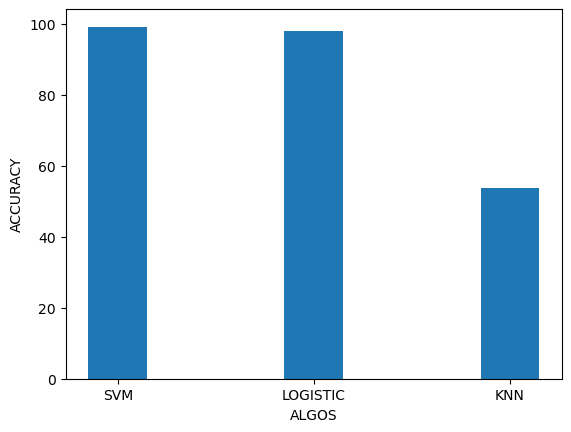

In [108]:
x_axis = ['SVM','LOGISTIC','KNN']
y_axis = [SVM_ACCURACY,test_data_accuracy,test_data_accurac]

plt.bar(x_axis, y_axis,width=0.3)

plt.xlabel('ALGOS')
plt.ylabel('ACCURACY')
plt.show()

